In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data = pd.read_csv('/content/omicron.csv')

data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1491840066506743820,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:22:43,Daily US Confirmed Covid Cases by County For M...,NaN,smcapplication,0,0,False
1,1491839660674490371,Gatherer Thompson,Corporate,I'm with the people who are with everyone. A s...,2009-05-10 23:01:22,639,1931,46369,False,2022-02-10 18:21:06,@Yascha_Mounk #CDC says number of fully #vacci...,"['CDC', 'vaccinated', 'Omicron', 'hospital']",Twitter Web App,0,0,False
2,1491839607368867842,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:20:54,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,0,0,False
3,1491839207169351689,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:19:18,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,2,1,False
4,1491839165608177667,Brownyard Group,"Bay Shore, NY",We offer liability coverage for the Security G...,2009-12-08 16:41:53,375,284,61,False,2022-02-10 18:19:08,With the #Beijing2022 #WinterOlympics already ...,"['Beijing2022', 'WinterOlympics', 'olympians',...",Agorapulse app,0,0,False


In [30]:
print(data.isnull().sum())

id                     0
user_name              0
user_location       3612
user_description    1330
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            6827
source                 0
retweets               0
favorites              0
is_retweet             0
dtype: int64


In [31]:
data = data.dropna()

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7575 entries, 1 to 17045
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                7575 non-null   int64 
 1   user_name         7575 non-null   object
 2   user_location     7575 non-null   object
 3   user_description  7575 non-null   object
 4   user_created      7575 non-null   object
 5   user_followers    7575 non-null   int64 
 6   user_friends      7575 non-null   int64 
 7   user_favourites   7575 non-null   int64 
 8   user_verified     7575 non-null   bool  
 9   date              7575 non-null   object
 10  text              7575 non-null   object
 11  hashtags          7575 non-null   object
 12  source            7575 non-null   object
 13  retweets          7575 non-null   int64 
 14  favorites         7575 non-null   int64 
 15  is_retweet        7575 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 902.5+ KB


##Sentiment Analysis

In [33]:
import nltk
import re

# Download NLTK stopwords dataset
nltk.download('stopwords')

# Create a Snowball stemmer for English
stemmer = nltk.SnowballStemmer("english")

# Import English stopwords from NLTK corpus
from nltk.corpus import stopwords

# Import string module for handling punctuation
import string

# Get the set of English stopwords from NLTK
stopword = set(stopwords.words('english'))

def clean(text):
    """
    Preprocesses and cleans the input text.

    Parameters:
    - text (str): The input text to be cleaned.

    Returns:
    - str: The cleaned and processed text.
    """
    # Convert text to lowercase
    text = str(text).lower()

    # Remove square brackets and content within them
    text = re.sub('\[.*?\]', '', text)

    # Remove URLs (http/https) and website links (www)
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # Remove HTML tags
    text = re.sub('<.*?>+', '', text)

    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Remove newline characters
    text = re.sub('\n', '', text)

    # Remove words containing digits
    text = re.sub('\w*\d\w*', '', text)

    # Tokenize the text and remove stopwords
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)

    # Stemming: Reduce words to their base or root form
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)

    return text

# Apply the clean function to the "text" column in the DataFrame
data["text"] = data["text"].apply(clean)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
data.text

1        yaschamounk cdc say number fulli vaccin omicro...
4         winterolymp alreadi underway us olympian look...
5        doctor help discov omicron say pressur reveal ...
8        month tonga final   singl  doubl tappeda sickn...
11       covid pandem continu ukrain case rapid rise du...
                               ...                        
17038    drahmedkalebi manag inevit insight word omicro...
17039     cuba also administ booster counter omicron wa...
17043    newzealand longcovidkid mask ventil school pol...
17044    patient coinfect differ variant yes common pos...
17045    dcyellowcab pay via electron payment contactle...
Name: text, Length: 7575, dtype: object

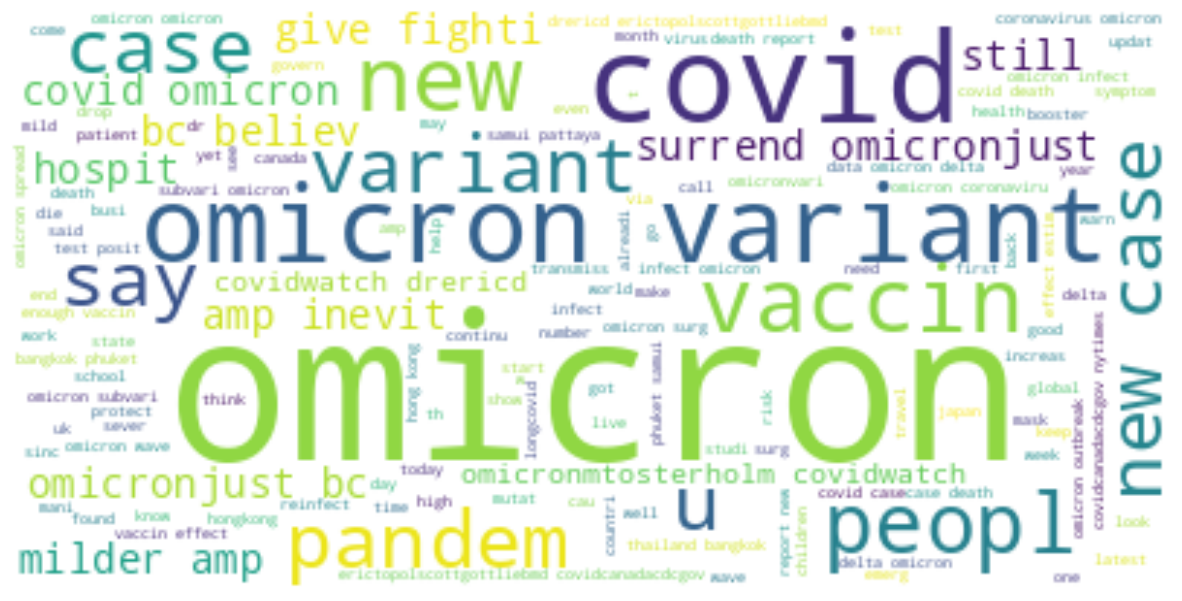

In [35]:
#Wordcloud of text

text = " ".join(i for i in data.text)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

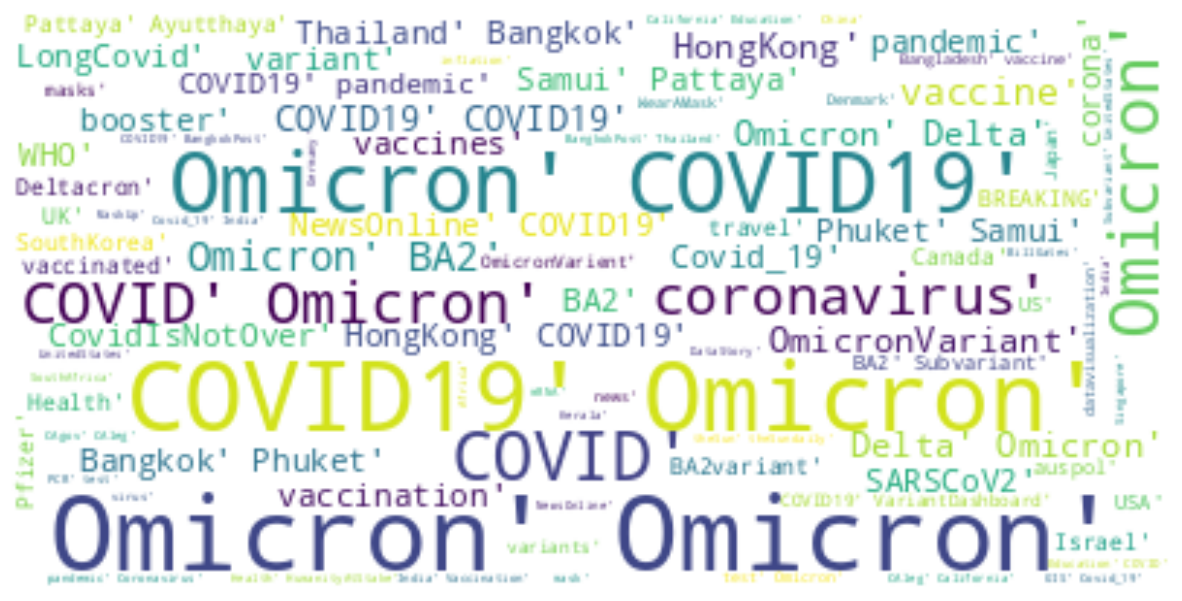

In [36]:
#Wordcloud of hashtags
text = " ".join(i for i in data.hashtags)

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

##Calculating Sentiment Scores

In [37]:
data.text

1        yaschamounk cdc say number fulli vaccin omicro...
4         winterolymp alreadi underway us olympian look...
5        doctor help discov omicron say pressur reveal ...
8        month tonga final   singl  doubl tappeda sickn...
11       covid pandem continu ukrain case rapid rise du...
                               ...                        
17038    drahmedkalebi manag inevit insight word omicro...
17039     cuba also administ booster counter omicron wa...
17043    newzealand longcovidkid mask ventil school pol...
17044    patient coinfect differ variant yes common pos...
17045    dcyellowcab pay via electron payment contactle...
Name: text, Length: 7575, dtype: object

In [39]:
# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Create a SentimentIntensityAnalyzer object
sentiments = SentimentIntensityAnalyzer()

# Calculate sentiment scores and add them as new columns in the DataFrame
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data.text]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data.text]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data.text]

# Select and reorder columns in the DataFrame
data = data[['text', 'Positive', 'Negative', 'Neutral']]

# Display the first few rows of the updated DataFrame
data.head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,text,Positive,Negative,Neutral
1,yaschamounk cdc say number fulli vaccin omicro...,0.126,0.0,0.874
4,winterolymp alreadi underway us olympian look...,0.000,0.0,1.000
5,doctor help discov omicron say pressur reveal ...,0.213,0.0,0.787
8,month tonga final singl doubl tappeda sickn...,0.000,0.0,1.000
11,covid pandem continu ukrain case rapid rise du...,0.000,0.0,1.000


In [43]:
x = data['Positive'].sum()
y = data['Negative'].sum()
z = data['Neutral'].sum()

def sentiment_score(a,b,c):
  if (a>b) & (a>c):
    print("Positive \U0001F60A")

  elif (b>a) & (b>c):
    print("Negative \U0001F620")

  else:
    print("Neutral \U0001F610")

sentiment_score(x,y,z)

Neutral 😐


## Most of the tweets are Neutral

In [44]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  487.61400000000003
Negative:  521.6110000000001
Neutral:  6565.8
